### Kaggle Competition - BBC News Classification

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

import os
print(os.listdir("dataset"))



['BBC News Sample Solution.csv', 'BBC News Test.csv', 'BBC News Train.csv']


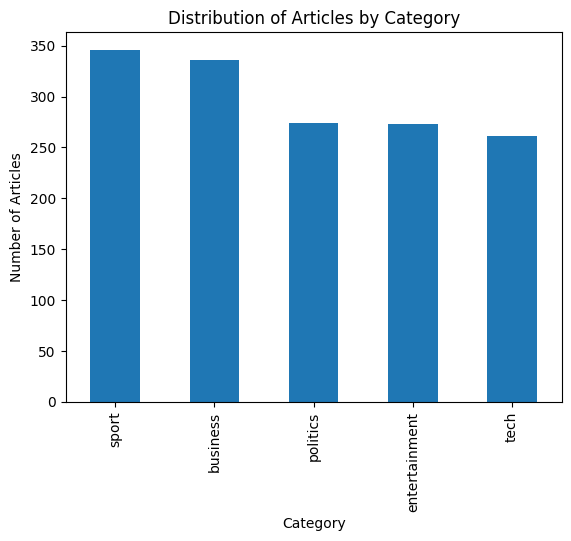

In [2]:
df = pd.read_csv('dataset/BBC News Train.csv')

# Categories
df['Category'].value_counts().plot(kind='bar')
plt.title('Distribution of Articles by Category')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.show()

### STOP WORDS
- Definition: Stop words are commonly used words in a language that are often filtered out before processing text data. These words typically include articles, prepositions, conjunctions, and other words that do not carry significant meaning or contribute to the text's semantic content.

- Purpose: Removing stop words can help reduce the dimensionality of the text data and focus on the words that are more meaningful for the analysis. This can improve the performance of text classification models by reducing noise.
### STEMMING
- Definition: Stemming is the process of reducing words to their base or root form. The idea is to remove suffixes and prefixes to obtain the stem of a word, which can help in normalizing words to a common base form.

- Example: The words "running", "runner", and "ran" can all be reduced to the stem "run".

- Purpose: Stemming helps in reducing the number of unique words in the text data, which can improve the efficiency of text processing and ensure that different forms of a word are treated as the same term.

In [8]:
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove stop words and apply stemming
    text = ' '.join(stemmer.stem(word) for word in text.split() if word not in stop_words)
    return text

df['cleaned_text'] = df['Text'].apply(preprocess_text)

print(df['cleaned_text'].head())



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/marco42/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    worldcom exboss launch defenc lawyer defend fo...
1    german busi confid slide german busi confid fe...
2    bbc poll indic econom gloom citizen major nati...
3    lifestyl govern mobil choic faster better funk...
4    enron boss 168m payout eighteen former enron d...
Name: cleaned_text, dtype: object
